Install Dependencies and necessary libraries

In [ ]:
!pip install -q kaggle
!pip install pycaret

In [ ]:
!pip install datasist autoviz

In [11]:
!pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Upload your kaggle.json file using this cell so that you can use the kaggle API
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ifeanyinneji","key":"68b7b1b6c0d102f7d9941d0b3eff800a"}'}

In [6]:
# This cell creates a .kaggle hidden folder in our root directory and copies the kaggle.json file to the folder.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

Download our dataset

In [7]:
# This cell will download the dataset used for this project to the /content directory and also unzip the csv file.
!kaggle datasets download -d hellbuoy/car-price-prediction
!unzip /content/car-price-prediction.zip

  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 15.2MB/s]
Archive:  /content/car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


Load our dataset, perform EDA and Visual Data analysis with Datasist and AutoViz Libraries

## Simple Data Analysis and Exploration with Datasist

In [1]:
import pandas as pd
import datasist as ds

data = pd.read_csv("CarPrice_Assignment.csv")
ds.structdata.describe(data)

First five data points


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]



Random five data points


car_ID  symboling           CarName fueltype aspiration doornumber  \
175     176         -1     toyota corona      gas        std       four   
109     110          0  peugeot 504 (sw)      gas        std       four   
102     103          0       nissan fuga      gas        std       four   
156     157          0    toyota mark ii      gas        std       four   
53       54          1        mazda rx-4      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
175  hatchback        fwd          front      102.4  ...         122   
109      wagon        rwd          front      114.2  ...         120   
102      wagon        fwd          front      100.4  ...         181   
156      sedan        fwd          front       95.7  ...          98   
53       sedan        fwd          front       93.1  ...          91   

     fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
175        mpfi       3.31    3.54              8.7         92     4200   
109        mpfi       3.46    3.19              8.4         97     5000   
102        mpfi       3.43    3.27              9.0        152     5200   
156        2bbl       3.19    3.03              9.0         70     4800   
53         2bbl       3.03    3.15              9.0         68     5000   

    citympg  highwaympg    price  
175      27          32   9988.0  
109      19          24  12440.0  
102      17          22  14399.0  
156      30          37   6938.0  
53       31          38   6695.0  

[5 rows x 26 columns]



Last five data points


car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]



Shape of  data set: (205, 26)


Size of  data set: 5330


Data Types
Note: All Non-numerical features are identified as objects in pandas


Data Type
car_ID               int64
symboling            int64
CarName             object
fueltype            object
aspiration          object
doornumber          object
carbody             object
drivewheel          object
enginelocation      object
wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
enginetype          object
cylindernumber      object
enginesize           int64
fuelsystem          object
boreratio          float64
stroke             float64
compressionratio   float64
horsepower           int64
peakrpm              int64
citympg              int64
highwaympg           int64
price              float64



Numerical Features in Data set
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


Categorical Features in Data set


['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']



Statistical Description of Columns


car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000



Description of Categorical Features


count unique            top freq
CarName          205    147  toyota corona    6
fueltype         205      2            gas  185
aspiration       205      2            std  168
doornumber       205      2           four  115
carbody          205      5          sedan   96
drivewheel       205      3            fwd  120
enginelocation   205      2          front  202
enginetype       205      7            ohc  148
cylindernumber   205      7           four  159
fuelsystem       205      8           mpfi   94



Unique class Count of Categorical features




Missing Values in Data


features  missing_counts  missing_percent
0             car_ID               0              0.0
1          symboling               0              0.0
2            CarName               0              0.0
3           fueltype               0              0.0
4         aspiration               0              0.0
5         doornumber               0              0.0
6            carbody               0              0.0
7         drivewheel               0              0.0
8     enginelocation               0              0.0
9          wheelbase               0              0.0
10         carlength               0              0.0
11          carwidth               0              0.0
12         carheight               0              0.0
13        curbweight               0              0.0
14        enginetype               0              0.0
15    cylindernumber               0              0.0
16        enginesize               0              0.0
17        fuelsystem               0              0.0
18         boreratio               0              0.0
19            stroke               0              0.0
20  compressionratio               0              0.0
21        horsepower               0              0.0
22           peakrpm               0              0.0
23           citympg               0              0.0
24        highwaympg               0              0.0
25             price               0              0.0

In [2]:
cat_feats = ds.structdata.get_cat_feats(data)
cat_feats

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## Automated Data Visualisation with AutoViz 

In [14]:
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

AV = AutoViz_Class()

Shape of your Data Set loaded: (205, 26)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    25 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['car_ID']

################ Regression problem #####################
D

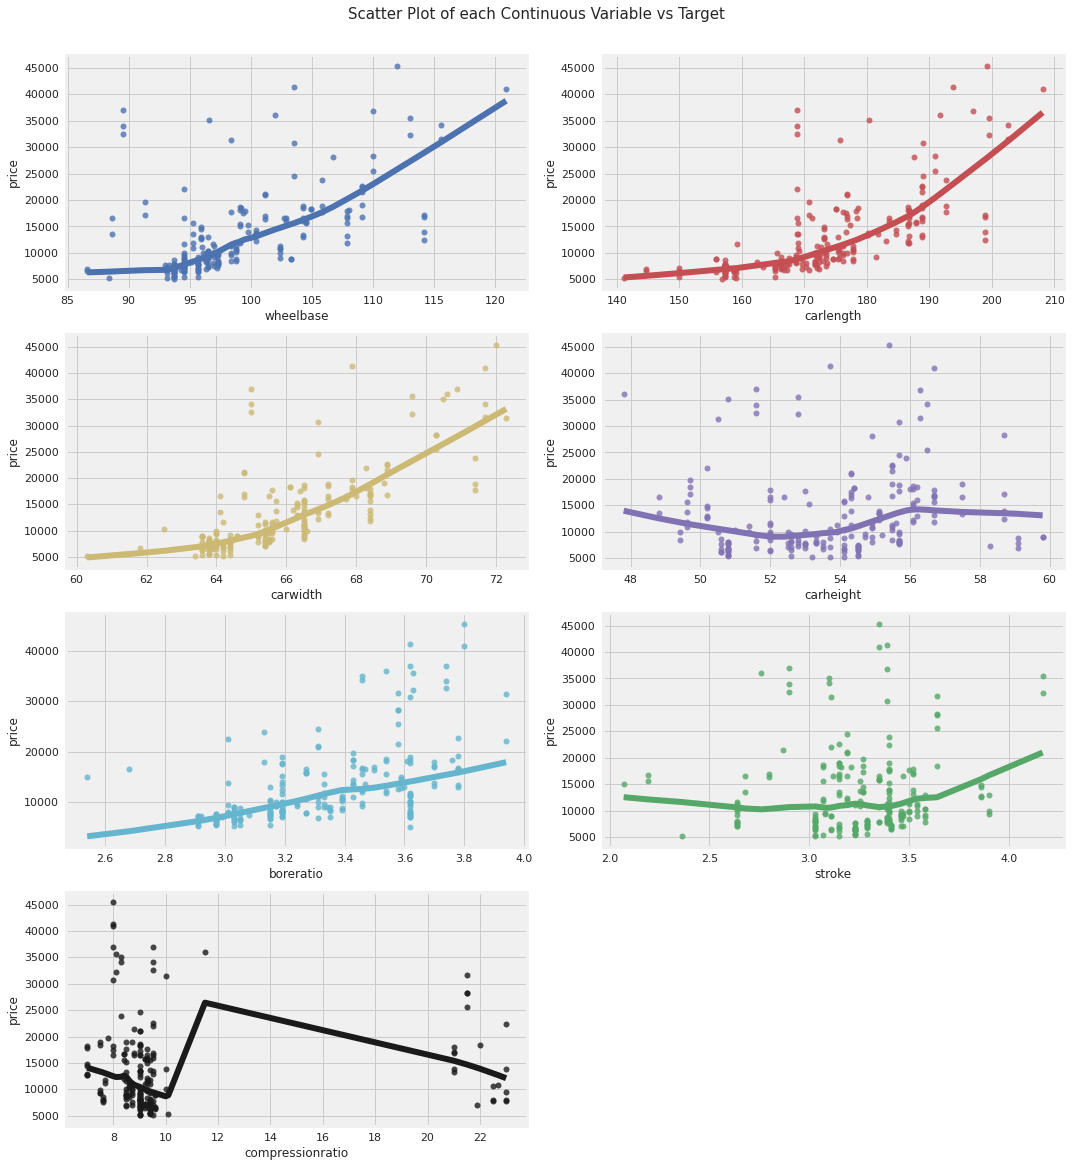

Using Lowess Smoothing. This might take a few minutes for large data sets...
Number of All Scatter Plots = 28


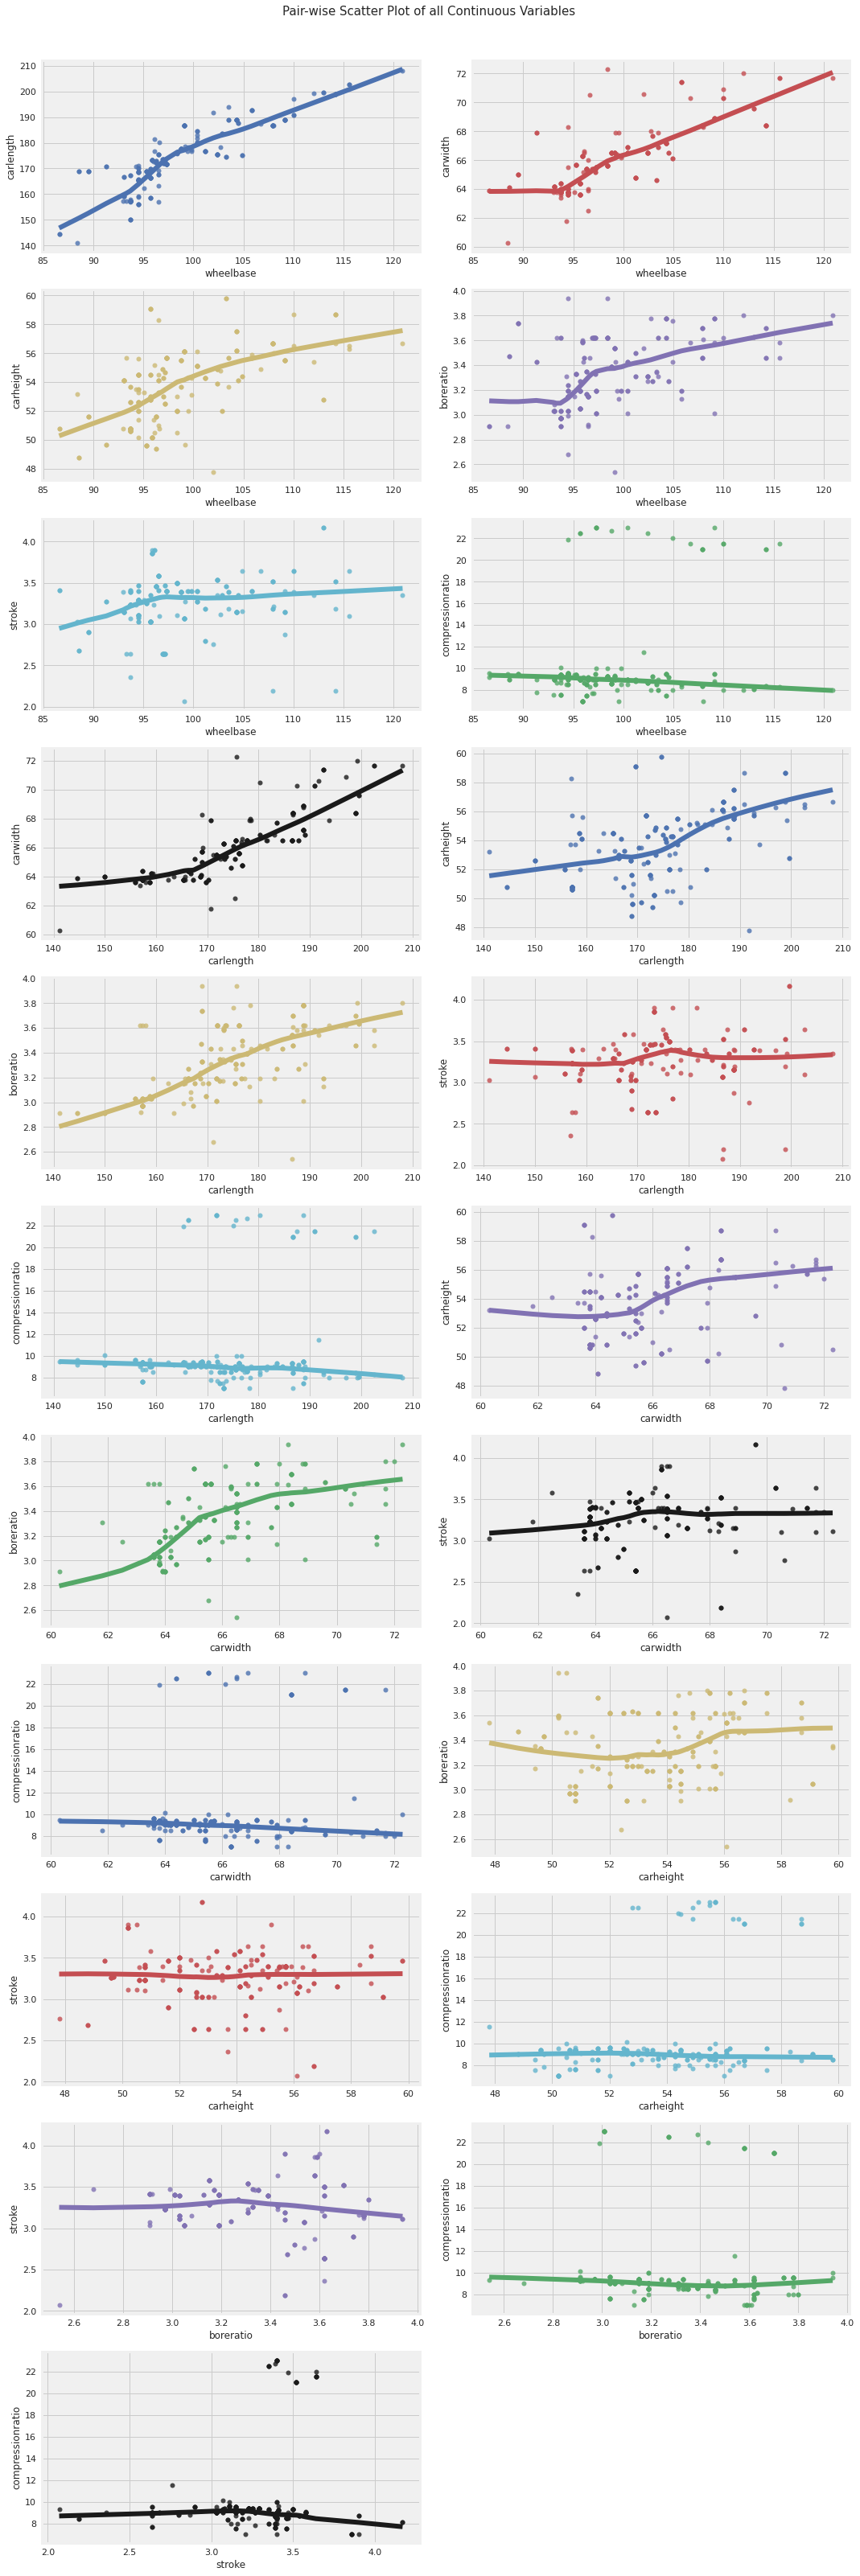

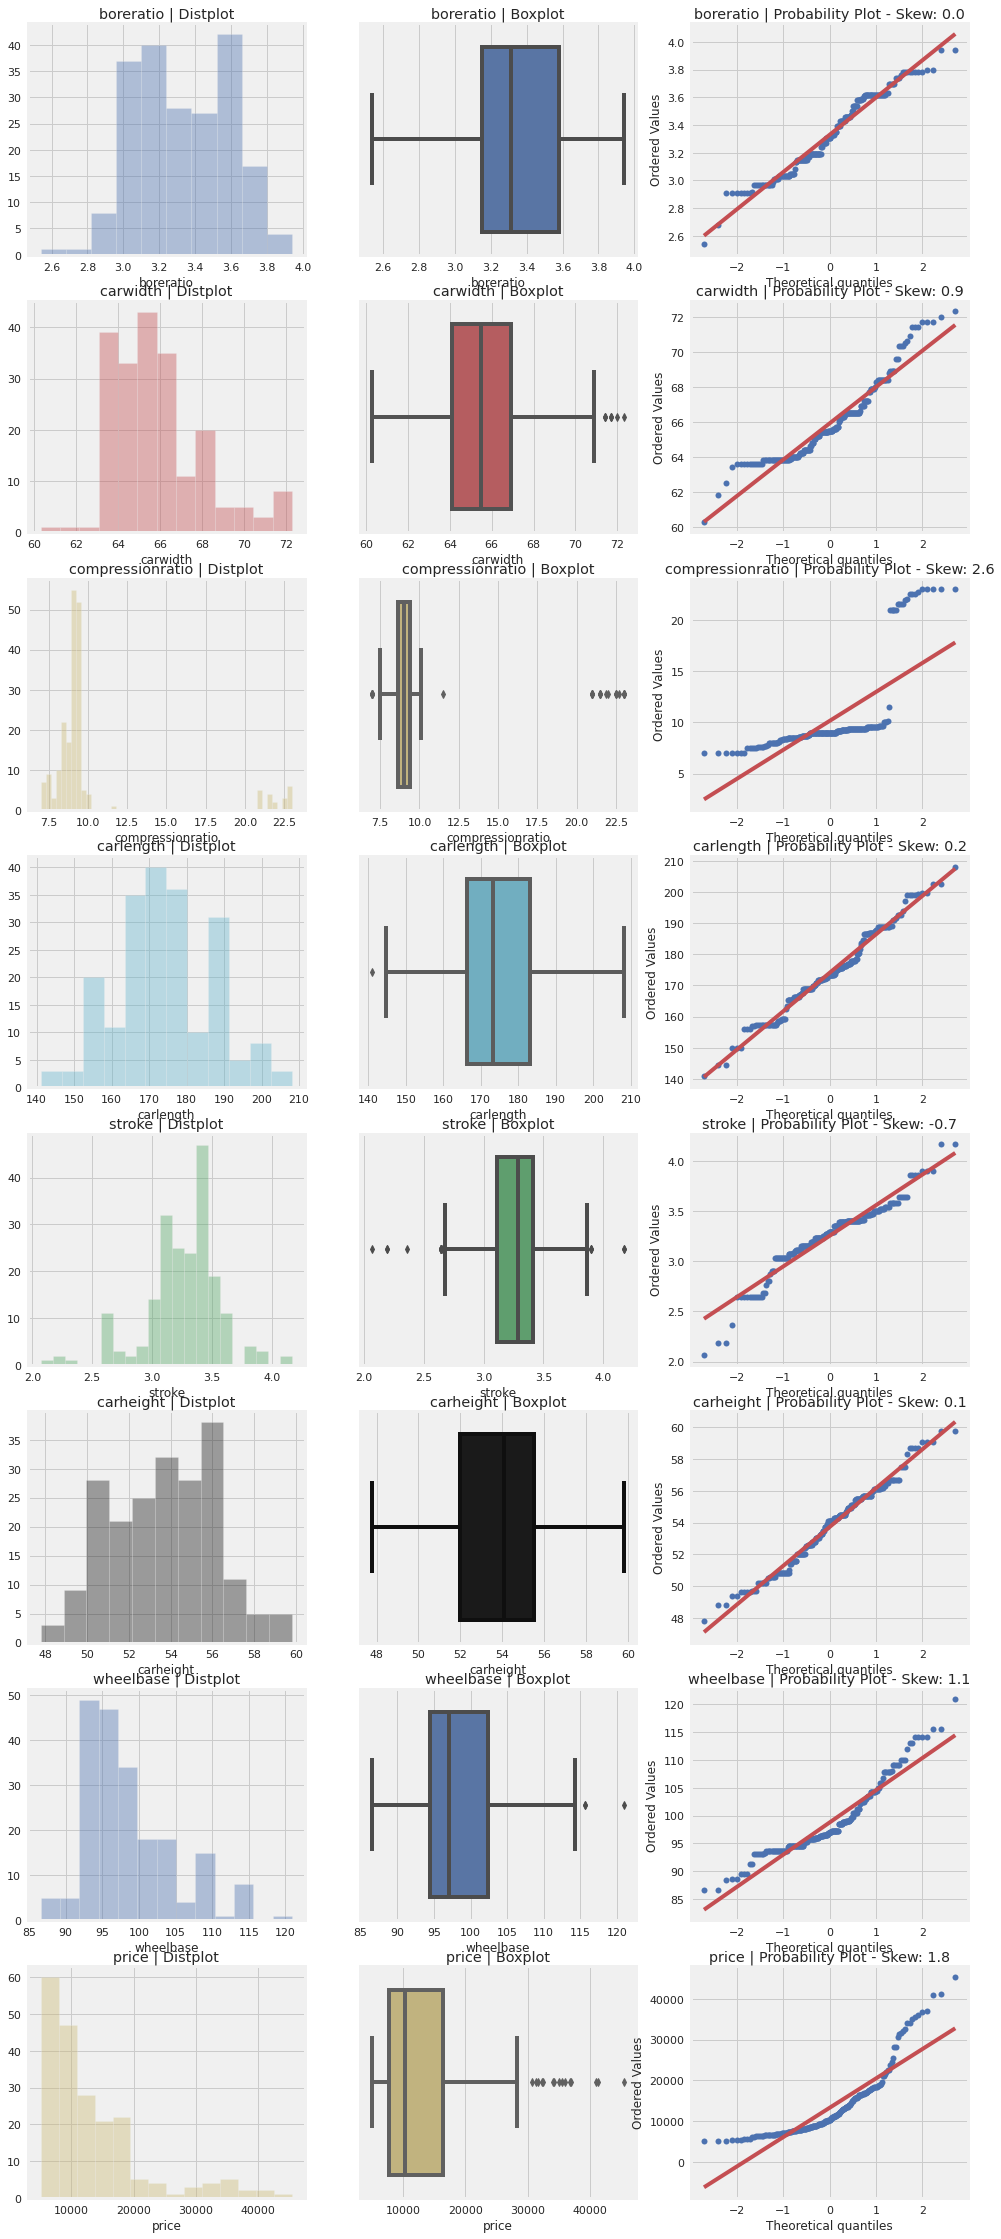

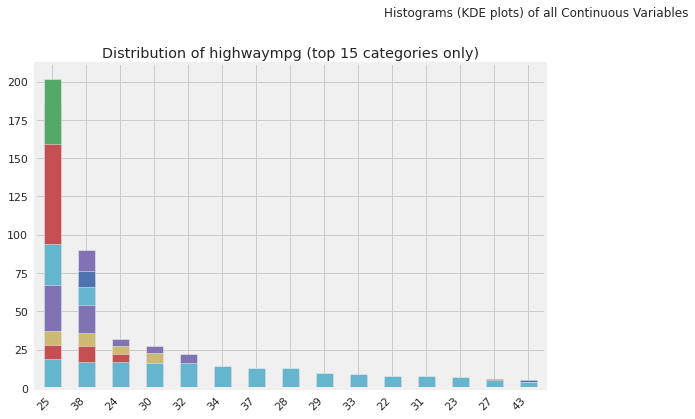

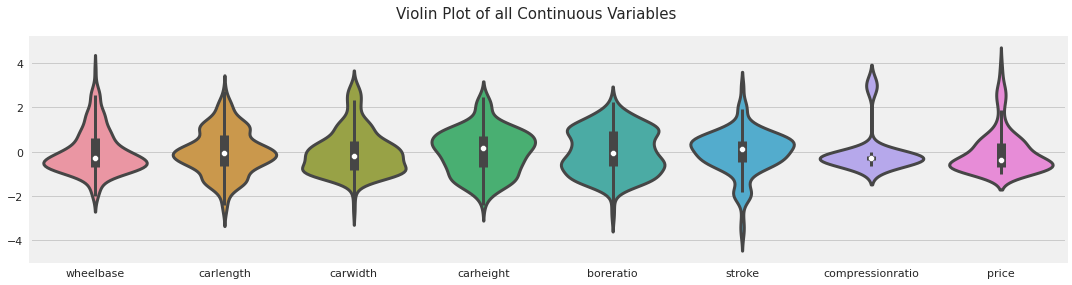

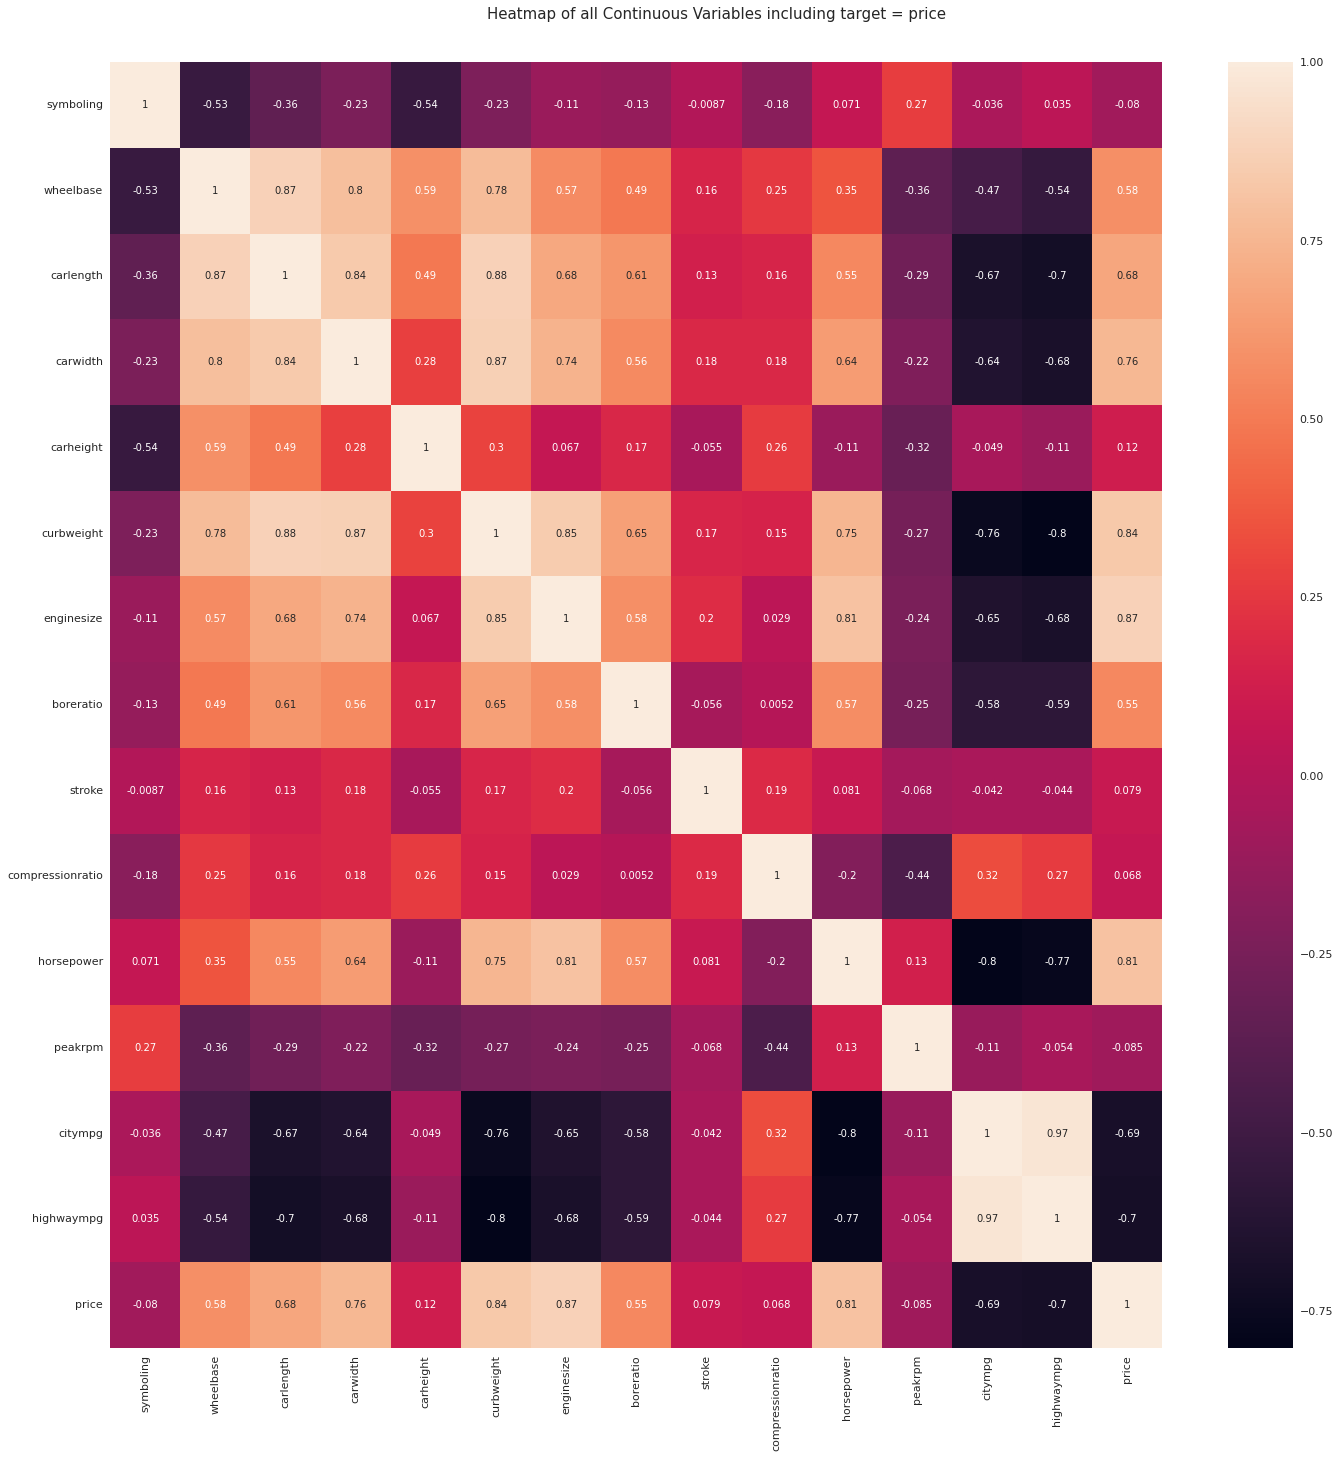

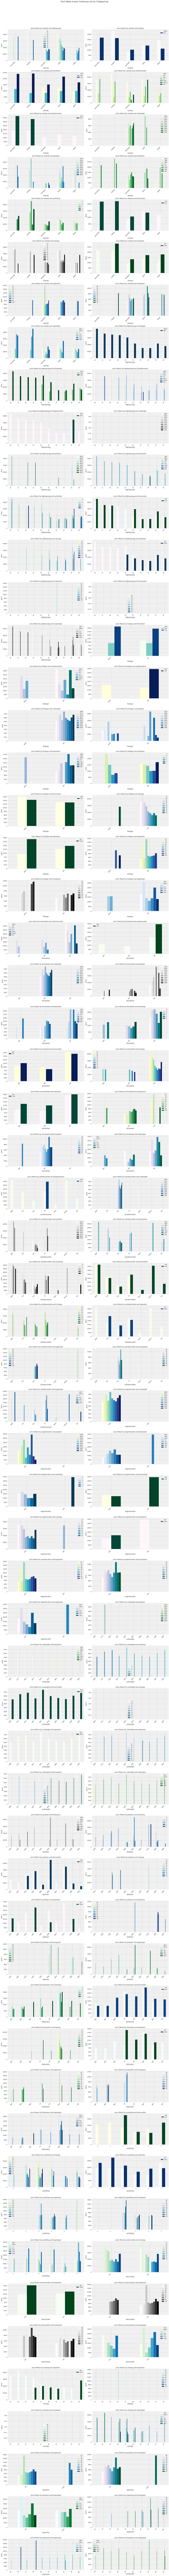

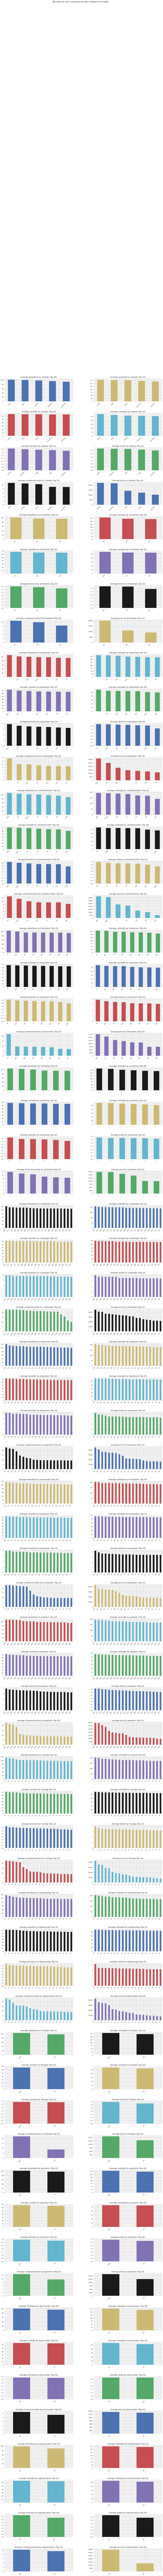

All Plots done
Could not draw wordcloud plot for CarName
Time to run AutoViz = 113 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


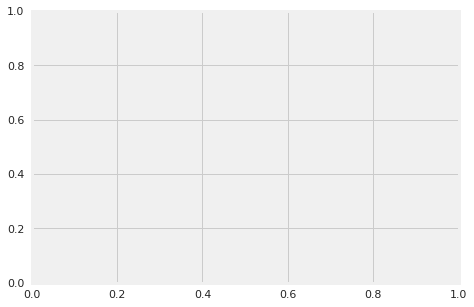

In [15]:
df = pd.read_csv("CarPrice_Assignment.csv")
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="price",
    dfte=data,
    header=0,
    verbose=1,
    lowess=True,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None,
)

## Modelling with Pycaret

**PyCaret** is an open-source, low-code machine learning library in Python that automates 


In [47]:
from pycaret.utils import version

version()

'2.3.10'

### Splitting the data

In [46]:
dataset = pd.read_csv("CarPrice_Assignment.csv")
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print("Data for Modeling: " + str(data.shape))
print("Unseen Data For Predictions: " + str(data_unseen.shape))

Data for Modeling: (195, 26)
Unseen Data For Predictions: (10, 26)


### Setting up pycaret for regression task


In [70]:
from pycaret.regression import *

reg = setup(data, target="price", session_id=786)

Description             Value
0                               session_id               786
1                                   Target             price
2                            Original Data         (195, 26)
3                           Missing Values             False
4                         Numeric Features                14
5                     Categorical Features                11
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (136, 156)
10                    Transformed Test Set         (59, 156)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              7fb3
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [71]:
compare_models()

Model           MAE           MSE  \
gbr           Gradient Boosting Regressor  1.662213e+03  5.132111e+06   
rf                Random Forest Regressor  1.530781e+03  4.778200e+06   
ada                    AdaBoost Regressor  1.858689e+03  5.804155e+06   
et                  Extra Trees Regressor  1.622648e+03  5.633130e+06   
llar         Lasso Least Angle Regression  2.103373e+03  8.734159e+06   
omp           Orthogonal Matching Pursuit  2.467685e+03  1.134381e+07   
lightgbm  Light Gradient Boosting Machine  1.992052e+03  8.822866e+06   
lasso                    Lasso Regression  2.357167e+03  1.411799e+07   
ridge                    Ridge Regression  2.299217e+03  9.178793e+06   
dt                Decision Tree Regressor  2.050886e+03  8.698552e+06   
knn                 K Neighbors Regressor  2.277080e+03  1.244991e+07   
en                            Elastic Net  2.282773e+03  9.664678e+06   
br                         Bayesian Ridge  2.342046e+03  1.094534e+07   
huber                     Huber Regressor  2.504193e+03  1.267724e+07   
lr                      Linear Regression  4.207699e+03  3.265876e+07   
par          Passive Aggressive Regressor  4.099863e+03  3.184526e+07   
dummy                     Dummy Regressor  6.206957e+03  6.841883e+07   
lar                Least Angle Regression  8.557275e+23  8.524700e+48   

                  RMSE            R2    RMSLE          MAPE  TT (Sec)  
gbr       2.191927e+03  8.686000e-01   0.1547  1.282000e-01     0.085  
rf        2.125825e+03  8.673000e-01   0.1464  1.172000e-01     0.472  
ada       2.338854e+03  8.430000e-01   0.1766  1.579000e-01     0.096  
et        2.293506e+03  8.226000e-01   0.1599  1.244000e-01     0.444  
llar      2.875027e+03  8.029000e-01   0.2910  1.639000e-01     0.091  
omp       3.235301e+03  7.751000e-01   0.3149  1.943000e-01     0.016  
lightgbm  2.838521e+03  7.703000e-01   0.1891  1.511000e-01     0.092  
lasso     3.358593e+03  7.620000e-01   0.2678  1.866000e-01     0.067  
ridge     2.941711e+03  7.393000e-01   0.2310  1.825000e-01     0.031  
dt        2.920723e+03  7.316000e-01   0.2035  1.545000e-01     0.019  
knn       3.417700e+03  7.264000e-01   0.2060  1.576000e-01     0.062  
en        3.029508e+03  6.994000e-01   0.2264  1.771000e-01     0.043  
br        3.213578e+03  6.931000e-01   0.2887  1.766000e-01     0.026  
huber     3.463390e+03  6.641000e-01   0.2845  1.898000e-01     0.065  
lr        5.504710e+03  2.030000e-01   0.7284  3.893000e-01     0.760  
par       5.291528e+03  7.950000e-02   0.4371  3.303000e-01     0.017  
dummy     8.063646e+03 -3.758000e-01   0.5380  5.365000e-01     0.012  
lar       1.220581e+24 -2.596323e+41  39.8732  7.913642e+19     0.107

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=786, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

We can see that the Gradient Boosting Regressor performs the best based on the r2 score.

In [72]:
gbr = create_model("gbr")

MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                            
0     1114.5744  1.944108e+06  1394.3127  0.9742  0.1088  0.0949
1     1758.9468  4.054344e+06  2013.5403  0.9442  0.1437  0.1239
2     2433.8186  1.020400e+07  3194.3706  0.8119  0.1901  0.1519
3     1090.6764  2.863971e+06  1692.3270  0.9036  0.1324  0.1077
4     1991.8094  6.323849e+06  2514.7263  0.8792  0.1923  0.1588
5     1868.1961  5.747828e+06  2397.4629  0.9377  0.1537  0.1251
6     1496.1675  3.779686e+06  1944.1414  0.9485  0.1633  0.1311
7     1322.6048  4.116552e+06  2028.9289  0.4472  0.1536  0.1278
8     2240.0465  9.586485e+06  3096.2049  0.9241  0.1799  0.1501
9     1305.2860  2.700280e+06  1643.2527  0.9149  0.1292  0.1111
Mean  1662.2126  5.132111e+06  2191.9268  0.8686  0.1547  0.1282
Std    445.7074  2.694597e+06   572.3352  0.1468  0.0260  0.0196

In [73]:
boosted_dt = ensemble_model(gbr, method="Boosting")

MAE           MSE       RMSE      R2   RMSLE    MAPE
Fold                                                            
0      898.5372  1.630591e+06  1276.9460  0.9784  0.1003  0.0796
1     1336.3223  2.785193e+06  1668.8898  0.9617  0.1214  0.0963
2     2184.7588  9.353294e+06  3058.3156  0.8276  0.1785  0.1362
3     1042.5305  2.625588e+06  1620.3667  0.9116  0.1301  0.1008
4     1797.7480  5.301565e+06  2302.5128  0.8987  0.1466  0.1264
5     1491.4550  3.524635e+06  1877.4011  0.9618  0.1255  0.0980
6     1308.2471  3.075950e+06  1753.8388  0.9581  0.1512  0.1157
7     1323.4138  5.035464e+06  2243.9840  0.3239  0.1597  0.1195
8     2167.9938  8.945689e+06  2990.9345  0.9292  0.1748  0.1457
9      803.6009  1.289399e+06  1135.5170  0.9594  0.0885  0.0705
Mean  1435.4607  4.356737e+06  1992.8706  0.8710  0.1377  0.1089
Std    459.6666  2.683604e+06   620.6478  0.1872  0.0284  0.0229

### Tuning Hyperparameters


In [ ]:
#tuned_gbr = tune_model(boosted_dt)

In [ ]:
#print(tuned_gbr)

In [ ]:
plot_model(boosted_dt, plot="feature")

In [ ]:
predict_model(tuned_gbr);

### Saving the final model

In [74]:
final_gbr = finalize_model(boosted_dt)

In [75]:
# Final Gradient Boosting model parameters for deployment
print(final_gbr)

AdaBoostRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [76]:
predict_model(final_gbr);

Model       MAE          MSE      RMSE      R2  \
0  Gradient Boosting Regressor  514.5787  367485.5121  606.2058  0.9938   

    RMSLE    MAPE  
0  0.0586  0.0483

### Predict on unseen data

In [77]:
unseen_predictions = predict_model(final_gbr, data=data_unseen)
unseen_predictions.head()

Model        MAE           MSE       RMSE      R2  \
0  Gradient Boosting Regressor  1715.9434  5.050501e+06  2247.3321  0.8498   

    RMSLE   MAPE  
0  0.1653  0.144

car_ID  symboling               CarName fueltype aspiration doornumber  \
0      21          0   chevrolet vega 2300      gas        std       four   
1      31          2           honda civic      gas        std        two   
2      65          0             mazda 626      gas        std       four   
3      88          1  mitsubishi outlander      gas      turbo       four   
4     104          0           nissan otti      gas        std       four   

     carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  boreratio  \
0      sedan        fwd          front       94.5  ...        2bbl       3.03   
1  hatchback        fwd          front       86.6  ...        1bbl       2.91   
2  hatchback        fwd          front       98.8  ...        2bbl       3.39   
3      sedan        fwd          front       96.3  ...        spdi       3.17   
4      sedan        fwd          front      100.4  ...        mpfi       3.43   

   stroke  compressionratio horsepower peakrpm  citympg highwaympg    price  \
0    3.11               9.6         70    5400       38         43   6575.0   
1    3.41               9.6         58    4800       49         54   6479.0   
2    3.39               8.6         84    4800       26         32  11245.0   
3    3.46               7.5        116    5500       23         30   9279.0   
4    3.27               9.0        152    5200       19         25  13499.0   

          Label  
0   7912.346465  
1   6399.847275  
2   9192.224044  
3   9510.386129  
4  15042.960577  

[5 rows x 27 columns]

In [78]:
from pycaret.utils import check_metric

check_metric(unseen_predictions["price"], unseen_predictions["Label"], metric="R2")

0.8498

In [79]:
save_model(final_gbr, "model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
          

In [80]:
model = load_model("model")

Transformation Pipeline and Model Successfully Loaded


In [81]:
new_prediction = predict_model(model, data=data_unseen)

Model        MAE           MSE       RMSE      R2  \
0  Gradient Boosting Regressor  1715.9434  5.050501e+06  2247.3321  0.8498   

    RMSLE   MAPE  
0  0.1653  0.144

In [82]:
unseen_predictions = predict_model(boosted_dt, data=data_unseen)

Model       MAE          MSE       RMSE      R2  \
0  Gradient Boosting Regressor  1585.049  3535345.333  1880.2514  0.8948   

    RMSLE    MAPE  
0  0.1496  0.1402